In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCS = 50
CHANNELS = 3

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/skin problem/IMG_CLASSES",shuffle = True, image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE)
)

Found 27371 files belonging to 10 classes.


In [ ]:
class_names = dataset.class_names
class_names

['1. Eczema 1677',
 '10. Warts Molluscum and other Viral Infections - 2103',
 '2. Melanoma 15.75k',
 '3. Atopic Dermatitis - 1.25k',
 '4. Basal Cell Carcinoma (BCC) 3323',
 '5. Melanocytic Nevi (NV) - 7970',
 '6. Benign Keratosis-like Lesions (BKL) 2624',
 '7. Psoriasis pictures Lichen Planus and related diseases - 2k',
 '8. Seborrheic Keratoses and other Benign Tumors - 1.8k',
 '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k']

In [ ]:
len(dataset)

856

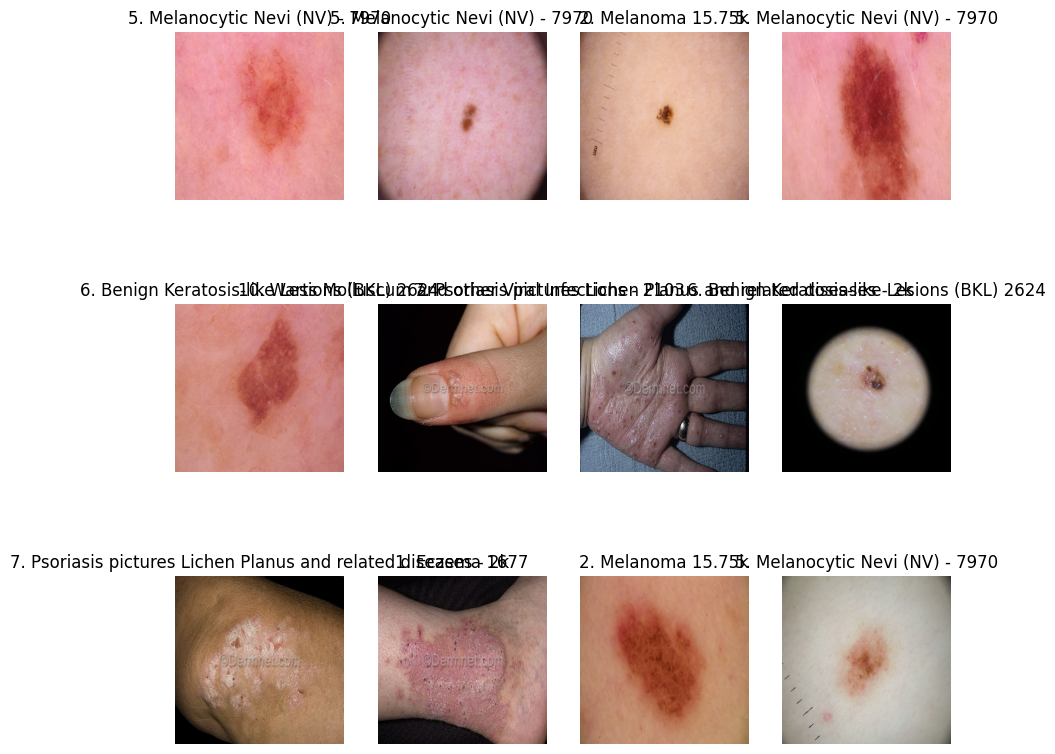

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split + test_split) == 1

    ds_size = len(ds) # ds is defined as a parameter to the function

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    # Make sure these lines are indented at the same level as the 'if' statement above
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = tf.keras.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Added dropout to reduce overfitting
    layers.Dense(n_classes, activation='softmax'),
])



In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
684/684 [==============================] - 402s 587ms/step - loss: 1.0747 - accuracy: 0.5816 - val_loss: 0.9954 - val_accuracy: 0.6029
Epoch 2/20
684/684 [==============================] - 384s 560ms/step - loss: 1.0691 - accuracy: 0.5838 - val_loss: 1.0041 - val_accuracy: 0.6092
Epoch 3/20
684/684 [==============================] - 402s 587ms/step - loss: 1.0595 - accuracy: 0.5856 - val_loss: 0.9990 - val_accuracy: 0.6096
Epoch 4/20
684/684 [==============================] - 387s 565ms/step - loss: 1.0564 - accuracy: 0.5917 - val_loss: 1.0021 - val_accuracy: 0.6154
Epoch 5/20
684/684 [==============================] - 384s 561ms/step - loss: 1.0545 - accuracy: 0.5886 - val_loss: 1.0061 - val_accuracy: 0.6099
Epoch 6/20
684/684 [==============================] - 395s 577ms/step - loss: 1.0460 - accuracy: 0.5912 - val_loss: 0.9578 - val_accuracy: 0.6173
Epoch 7/20
684/684 [==============================] - 386s 564ms/step - loss: 1.0308 - accuracy: 0.5980 - val_loss: 0.9335 -